<a href="https://colab.research.google.com/github/MikolajWasowski/neural-network-course/blob/master/01_intro/01_pierwszy_model_sieci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
    1. [Import bibliotek](#a2)
    2. [Załadowanie i przygotowanie danych](#a3)
    3. [Eksploracja danych](#a4)
    4. [Budowa sieci neuronowej](#a5)    
    5. [Trenowanie modelu](#a6)
    6. [Ocena modelu](#a7)
    7. [Predykcja na podstawie modelu](#a8)

### <a name='a1'></a>1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

#### <a name='a2'></a> 1.1 Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.15.0


### <a name='a3'></a> 1.2 Załadowanie i przygotowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [4]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a> 1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

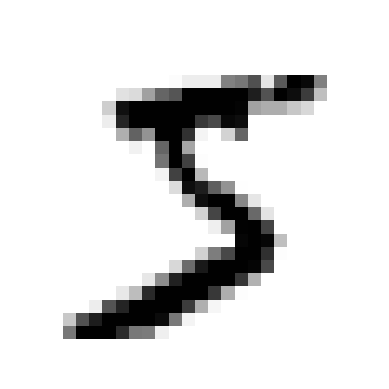

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

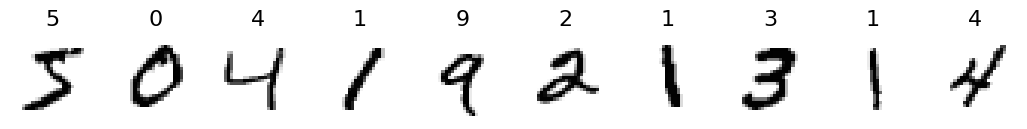

In [7]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> 1.4 Budowa sieci neuronowej

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <a name='a6'></a> 1.5 Trenowanie modelu

In [10]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2954 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1392 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1050 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0749 - accuracy: 0.9761


### <a name='a7'></a> 1.6 Ocena modelu

In [11]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0783 - accuracy: 0.9753 - 929ms/epoch - 3ms/step


[0.07833325862884521, 0.9753000140190125]

In [12]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.295377,0.914250
1,0.139244,0.958750
2,0.105018,0.967683
3,0.086550,0.972900
4,0.074900,0.976117


In [13]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

### <a name='a8'></a> 1.7 Predykcja na podstawie modelu

In [14]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[0.000000817749, 0.000000006386, 0.000008550089, ..., 0.9999506     , 0.000000137635, 0.000001056546],
       [0.000000000048, 0.000004302434, 0.99999267    , ..., 0.000000000001, 0.000000013314, 0.000000000002],
       [0.000003814034, 0.9967797     , 0.00041324666 , ..., 0.0019837352  , 0.00065705756 , 0.00000062298 ],
       ...,
       [0.000000000002, 0.000000001553, 0.000000000002, ..., 0.000001503931, 0.00000015189 , 0.000006388327],
       [0.000000010997, 0.000000000013, 0.000000000019, ..., 0.000000000469, 0.000004296776, 0.000000000332],
       [0.00000001457 , 0.            , 0.000000025008, ..., 0.00000000014 , 0.000000000433, 0.000000000055]],
      dtype=float32)

In [21]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [23]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([115, 149, 151, 241, 247, 259, 321, 340, 381, 445], dtype='int64')

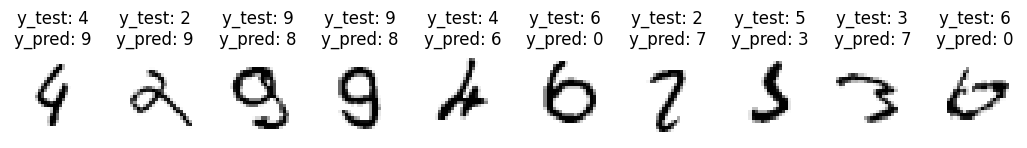

In [24]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()